Загрузка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import numpy as np

In [3]:
# Загрузка данных о домах
house_data = pd.read_csv("Boston.csv")

In [6]:
house_data= house_data.drop(columns=['Unnamed: 0']) #

In [11]:
house_data=house_data.rename(str.upper, axis='columns')

In [12]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  BLACK    506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [14]:
house_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [15]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  BLACK    506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [16]:
house_data.duplicated().sum()

0

In [17]:
house_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
BLACK      0
LSTAT      0
MEDV       0
dtype: int64

In [18]:
house_data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']] = house_data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']].interpolate(method='linear', limit_direction='forward')

In [19]:
house_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
BLACK      0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
house_data.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
CRIM,506.000000,3.676492,8.714302,0.006320,0.080573,0.256510,3.689388,88.976200
ZN,506.000000,11.419960,23.231082,0.000000,0.000000,0.000000,13.625000,100.000000
INDUS,506.000000,11.127105,6.853911,0.460000,5.190000,9.690000,18.100000,27.740000
CHAS,506.000000,0.067194,0.250605,0.000000,0.000000,0.000000,0.000000,1.000000
NOX,506.000000,0.554695,0.115878,0.385000,0.449000,0.538000,0.624000,0.871000
RM,506.000000,6.284634,0.702617,3.561000,5.885500,6.208500,6.623500,8.780000
AGE,506.000000,68.694071,27.909935,2.900000,45.450000,77.150000,93.975000,100.000000
DIS,506.000000,3.795043,2.105710,1.129600,2.100175,3.207450,5.188425,12.126500
RAD,506.000000,9.549407,8.707259,1.000000,4.000000,5.000000,24.000000,24.000000
TAX,506.000000,408.237154,168.537116,187.000000,279.000000,330.000000,666.000000,711.000000


In [25]:
# Загрузка данных об ирисах
from sklearn.datasets import load_iris
iris = load_iris()

In [26]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [31]:
iris_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [37]:
iris_data["id"] = iris_data.index
iris_data["species"] = iris_data["target"]



In [40]:
iris_data= iris_data.drop(columns=['target']) #

In [41]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),id,species
0,5.1,3.5,1.4,0.2,0,0.0
1,4.9,3.0,1.4,0.2,1,0.0
2,4.7,3.2,1.3,0.2,2,0.0
3,4.6,3.1,1.5,0.2,3,0.0
4,5.0,3.6,1.4,0.2,4,0.0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,145,2.0
146,6.3,2.5,5.0,1.9,146,2.0
147,6.5,3.0,5.2,2.0,147,2.0
148,6.2,3.4,5.4,2.3,148,2.0


In [12]:
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [42]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   id                 150 non-null    int64  
 5   species            150 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 7.2 KB


In [43]:
iris_data.duplicated().sum()

0

In [44]:
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
id                   0
species              0
dtype: int64

In [45]:
iris_data.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.000000,5.843333,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000
sepal width (cm),150.000000,3.057333,0.435866,2.000000,2.800000,3.000000,3.300000,4.400000
petal length (cm),150.000000,3.758000,1.765298,1.000000,1.600000,4.350000,5.100000,6.900000
petal width (cm),150.000000,1.199333,0.762238,0.100000,0.300000,1.300000,1.800000,2.500000
id,150.000000,74.500000,43.445368,0.000000,37.250000,74.500000,111.750000,149.000000
species,150.000000,1.000000,0.819232,0.000000,0.000000,1.000000,2.000000,2.000000


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
l = LabelEncoder()
iris_data['Species'] = l.fit_transform(iris_data['Species'])

In [46]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),id,species
0,5.1,3.5,1.4,0.2,0,0.0
1,4.9,3.0,1.4,0.2,1,0.0
2,4.7,3.2,1.3,0.2,2,0.0
3,4.6,3.1,1.5,0.2,3,0.0
4,5.0,3.6,1.4,0.2,4,0.0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,145,2.0
146,6.3,2.5,5.0,1.9,146,2.0
147,6.5,3.0,5.2,2.0,147,2.0
148,6.2,3.4,5.4,2.3,148,2.0


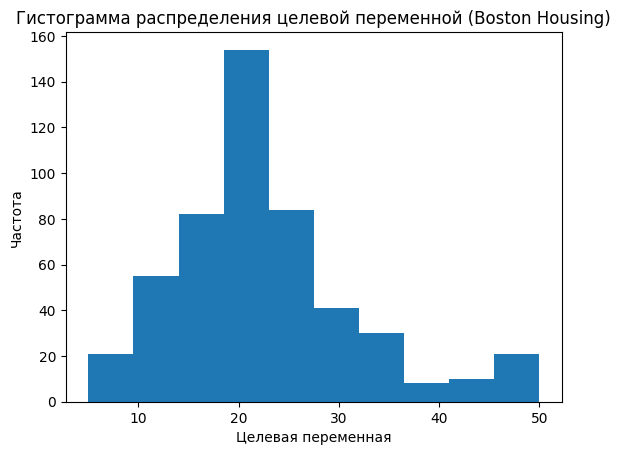

In [47]:
plt.hist(house_data['MEDV'], bins=10)
plt.xlabel('Целевая переменная')
plt.ylabel('Частота')
plt.title('Гистограмма распределения целевой переменной (Boston Housing)')
plt.show();

Text(0.5, 1.0, 'Гистограмма распределения целевой переменной (Iris)')

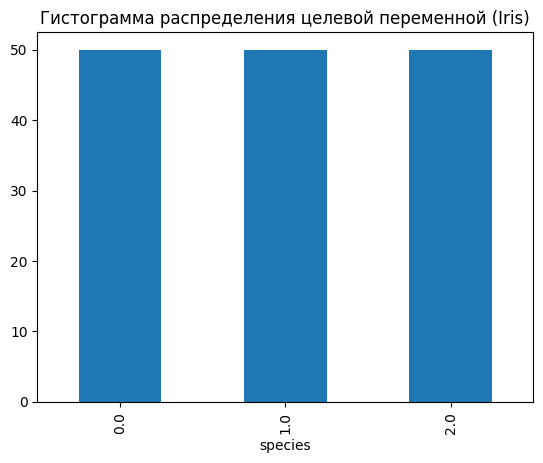

In [48]:
iris_data['species'].value_counts().plot(kind='bar');
plt.title('Гистограмма распределения целевой переменной (Iris)')

2. Разделение данных на обучающую и тестовую выборки

In [49]:
# Для данных о домах
X_house = house_data.drop("MEDV", axis=1)
y_house = house_data["MEDV"]
X_house_train, X_house_test, y_house_train, y_house_test = train_test_split(
    X_house, y_house, test_size=0.3, random_state=42
)

In [50]:
# Для данных об ирисах
X_iris = iris_data.drop("species", axis=1)
y_iris = iris_data["species"]
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42)

3. Создание и обучение модели регрессии

In [51]:
# Создание модели линейной регрессии
model_regression = LinearRegression()

In [52]:
# Обучение модели на обучающей выборке
model_regression.fit(X_house_train, y_house_train)

LinearRegression()

4. Оценка качества модели регрессии

In [53]:
# Предсказание на тестовой выборке
y_house_pred = model_regression.predict(X_house_test)

In [54]:
# Вычисление метрик качества
mae = mean_absolute_error(y_house_test, y_house_pred)
11
mse = mean_squared_error(y_house_test, y_house_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_house_test, y_house_pred)
# Вывод результатов
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")


MAE: 3.16
MSE: 21.52
RMSE: 4.64
R^2: 0.71


Эти данные позволяют сделать следующие выводы:

Rjhtym cреднеквадратической ошибки (RMSE): 4.67

 RMSE  - это мера того, насколько хорошо модель предсказывает фактические значения.
 Чем меньше RMSE, тем лучше модель.


Коэффициент детерминации (R^2): 0.71

 R^2  - это мера того, насколько хорошо модель объясняет изменения в данных.
 R^2 принимает значения от 0 до 1. Чем ближе R^2 к 1, тем лучше модель объясняет данные.
 В данном случае R^2 равен 0.71, что означает, что модель объясняет 71% изменений в данных.
 Это хороший показатель, так как  R^2 больше 0.5, что свидетельствует о том, что модель достаточно хорошо объясняет данные.

Вывод:

 Модель достаточно неплохо предсказывает фактические значения, но есть пространство для улучшения.
 R^2 показывает, что модель хорошо объясняет изменения в данных.
 Для более точной оценки качества модели необходимо знать конкретную задачу и тип данных.

Рекомендуемые действия:

 Сравнить эту модель с другими моделями, чтобы оценить ее эффективность.
 Попробовать улучшить модель, например, добавив новые переменные или изменив алгоритм.
 Проанализировать остатки модели, чтобы проверить,  есть ли какие-то систематические ошибки.

5. Создание и обучение модели классификации

In [55]:
# Создание модели k-ближайших соседей
model_classification = KNeighborsClassifier(n_neighbors=2)

In [56]:
# Обучение модели k-neibours на обучающей выборке
model_classification.fit(X_iris_train, y_iris_train)

KNeighborsClassifier(n_neighbors=2)

6. Оценка качества модели классификации

**K-neibours**

In [57]:
# Предсказание на тестовой выборке
y_iris_pred1 = model_classification.predict(X_iris_test)

In [58]:
# Вычисление метрик качества
accuracy = accuracy_score(y_iris_test, y_iris_pred1)
precision = precision_score(y_iris_test, y_iris_pred1, average="macro")
recall = recall_score(y_iris_test, y_iris_pred1, average="macro")
f1 = f1_score(y_iris_test, y_iris_pred1, average="macro")
confusion_mat = confusion_matrix(y_iris_test, y_iris_pred1)


In [59]:
print(f"Точность: {accuracy:.2f}")
print(f"Точность (Precision): {precision:.2f}")
print(f"Полнота (Recall): {recall:.2f}")
print(f"F1-мера: {f1:.2f}")
print("Матрица ошибок:\n", confusion_mat)

Точность: 1.00
Точность (Precision): 1.00
Полнота (Recall): 1.00
F1-мера: 1.00
Матрица ошибок:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [60]:
print(classification_report(y_iris_test, y_iris_pred1))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [61]:
import seaborn as sns

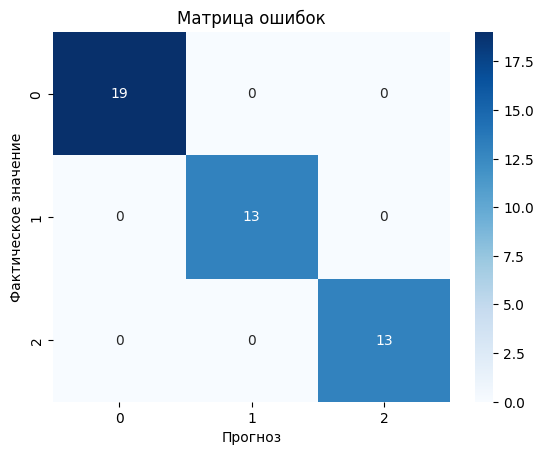

In [62]:
# Визуализация матрицы ошибок
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap = "Blues")
plt.xlabel("Прогноз")
plt.ylabel("Фактическое значение")
plt.title("Матрица ошибок")
plt.show();

Эти данные показывают идеальную производительность модели.

Объяснение:

 Точность (Precision)  = 1.00 означает, что все предсказанные положительные случаи были действительно положительными. Другими словами, модель не сделала ни одной ложноположительной ошибки.
 Полнота (Recall) = 1.00 означает, что модель нашла все положительные случаи. Другими словами, модель не пропустила ни одного положительного случая.
 F1-мера = 1.00  является гармоническим средним точности и полноты. Поскольку оба показателя равны 1.00, F1-мера также равна 1.00, что подтверждает идеальную производительность модели.

В целом, данные указывают на то, что модель прекрасно справляется с задачей классификации и не делает ошибок.

Однако, важно учитывать контекст:

 Размер выборки: Идеальные показатели могут быть достигнуты на очень маленькой выборке.
 Сложность задачи: Простые задачи классификации могут быть легко решены даже простыми моделями.
 Сбалансированность данных: Идеальные показатели могут быть достигнуты, если данные сильно сбалансированы (т.е. количество положительных и отрицательных примеров одинаково).

Важно проверить эти показатели на разных выборках данных (например, на тестовой выборке), чтобы убедиться, что модель действительно работает хорошо и не переобучается.

**Интерпретация confusion_matrix - в тестовой выборке все 19 объектов класса 0 были правильно отнесены к классу 0, все 13 объектов класса 1 были правильно отнесены к классу 1, все 13 объектов класса 2 были правильно отнесены к классу 2, неправильно классифицированных объектов не было.**

*Кривые ROC и показатель AUC*

Интерпретация метрик качества на примере набора diabetes-dataset с помощью модели CatBoost

In [64]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [66]:
df.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000000,3.845052,3.369578,0.000000,1.000000,3.000000,6.000000,17.000000
Glucose,768.000000,120.894531,31.972618,0.000000,99.000000,117.000000,140.250000,199.000000
BloodPressure,768.000000,69.105469,19.355807,0.000000,62.000000,72.000000,80.000000,122.000000
SkinThickness,768.000000,20.536458,15.952218,0.000000,0.000000,23.000000,32.000000,99.000000
Insulin,768.000000,79.799479,115.244002,0.000000,0.000000,30.500000,127.250000,846.000000
BMI,768.000000,31.992578,7.884160,0.000000,27.300000,32.000000,36.600000,67.100000
DiabetesPedigreeFunction,768.000000,0.471876,0.331329,0.078000,0.243750,0.372500,0.626250,2.420000
Age,768.000000,33.240885,11.760232,21.000000,24.000000,29.000000,41.000000,81.000000
Outcome,768.000000,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


In [67]:
df.drop(df[(df['Glucose'] == 0) | (df['BMI'] == 0) | (df['BloodPressure'] == 0)].index, inplace=True)

In [68]:
df['SkinThickness'].replace(0, np.nan, inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace=True)
df = df.drop(['Insulin'], axis=1)

/var/folders/4b/7k6l7jgn2zx1vq46wr0m6fbw0000gn/T/ipykernel_39716/766328801.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SkinThickness'].replace(0, np.nan, inplace=True)


In [69]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [70]:
from catboost import CatBoostClassifier

In [71]:
X = df.drop(["Outcome", "Pregnancies", 'SkinThickness'], axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6)
model.fit(X_train, y_train)

0:	learn: 0.6463337	total: 65.3ms	remaining: 1m 5s
1:	learn: 0.6163498	total: 66.6ms	remaining: 33.2s
2:	learn: 0.5852196	total: 67.5ms	remaining: 22.4s
3:	learn: 0.5627417	total: 68.4ms	remaining: 17s
4:	learn: 0.5390126	total: 69.3ms	remaining: 13.8s
5:	learn: 0.5144878	total: 70.3ms	remaining: 11.6s
6:	learn: 0.4994341	total: 71.1ms	remaining: 10.1s
7:	learn: 0.4868791	total: 71.9ms	remaining: 8.92s
8:	learn: 0.4770378	total: 72.7ms	remaining: 8.01s
9:	learn: 0.4671620	total: 73.5ms	remaining: 7.27s
10:	learn: 0.4601985	total: 74.3ms	remaining: 6.68s
11:	learn: 0.4545930	total: 74.9ms	remaining: 6.17s
12:	learn: 0.4493910	total: 75.7ms	remaining: 5.75s
13:	learn: 0.4426084	total: 76.5ms	remaining: 5.38s
14:	learn: 0.4356227	total: 77.2ms	remaining: 5.07s
15:	learn: 0.4295523	total: 78ms	remaining: 4.8s
16:	learn: 0.4247375	total: 78.8ms	remaining: 4.56s
17:	learn: 0.4178817	total: 79.6ms	remaining: 4.34s
18:	learn: 0.4142956	total: 80.3ms	remaining: 4.15s
19:	learn: 0.4094558	total:

In [73]:
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7586206896551724


In [74]:
y_pred = model.predict(X_test)

In [76]:
# Вычисление метрик качества
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")
confusion_mat = confusion_matrix(y_test, y_pred)

In [77]:
print(f"Точность: {accuracy:.2f}")
print(f"Точность (Precision): {precision:.2f}")
print(f"Полнота (Recall): {recall:.2f}")
print(f"F1-мера: {f1:.2f}")
print("Матрица ошибок:\n", confusion_mat)

Точность: 0.76
Точность (Precision): 0.72
Полнота (Recall): 0.73
F1-мера: 0.72
Матрица ошибок:
 [[81 21]
 [14 29]]


In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       102
           1       0.58      0.67      0.62        43

    accuracy                           0.76       145
   macro avg       0.72      0.73      0.72       145
weighted avg       0.77      0.76      0.76       145



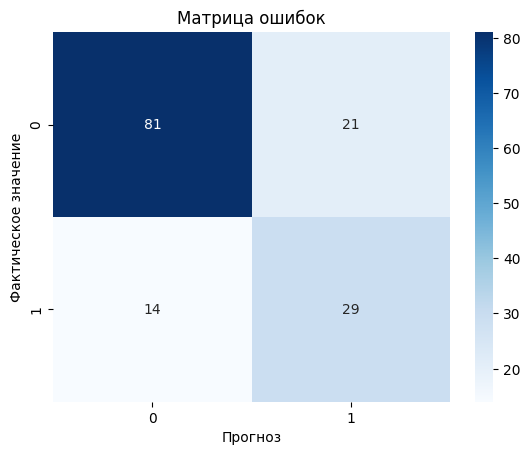

In [79]:
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap = "Blues")
plt.xlabel("Прогноз")
plt.ylabel("Фактическое значение")
plt.title("Матрица ошибок")
plt.show();

Модель правильно нашла 95% всех случаев с 0 целевым значением (нет диабета), 100% всех случаев с 1 целевым значением (диабет есть); из всех предсказаний объектов со значением 0 модель оказалась права в 100% случаев, из всех предсказаний объектов со значением 1 модель оказалась права в 91% случаев.

В тестовой выборке 12 объектов ошибочно были классифицированы, как позитивные (False Positive) - ошибочно поставлен диагноз наличия диабета. Непоставленного диагноза при его наличии модель не допустила.

In [80]:
#Предсказываем вероятности
y_pred_proba = model.predict_proba(X_test)[:, 1]

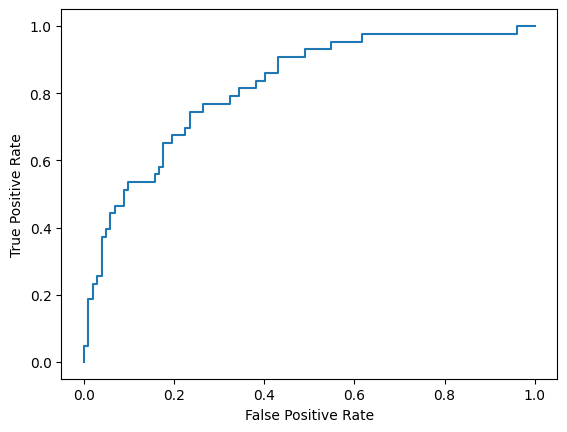

In [81]:
# Строим кривую ROC
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Находим значение показателя AUC

In [82]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC: %.3f" % auc)

AUC: 0.819


In [83]:
import plotly.graph_objs as go

trace = go.Scatter(x=fpr, y=tpr, mode='lines', name='AUC = %0.2f' % auc,
                   line=dict(color='darkorange', width=2))
reference_line = go.Scatter(x=[0,1], y=[0,1], mode='lines', name='Reference Line',
                            line=dict(color='navy', width=2, dash='dash'))
fig = go.Figure(data=[trace, reference_line])
fig.update_layout(title='Interactive ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Показатель AUC (Area under Curve) - площади под кривой ROC - интерпретирует вероятность, с которой модель верно определит две точки (объекта), расположенные в разных классах, которые поданы ей на вход для анализа. В нашем случае это вероятность 98,8%. Показатель 50% (площадь под синей пунктирной кривой - вариант случайного выбора, рандомного угадывания)